In [1]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from Helpers import helpers

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), timings=False)

/opt/conda/lib/python3.9/site-packages/art/estimators/certification/__init__.py:14: UserWarning: PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality
  warnings.warn("PyTorch not found. Not importing DeepZ or Interval Bound Propagation functionality")


In [2]:
import numpy as np


colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns

def plot_2d_cluster(X, model, columns = ['X', 'Y']):
    means = model.cluster_centers_ if 'cluster_centers_' in dir(model) else model.labels_
    ax = sns.scatterplot(X[columns[0]], X[columns[1]], c=vectorizer(model.labels_))
    ax = sns.scatterplot(means[:, 0], means[:, 1], ec='red', legend=False, ax=ax)
    plt.show()

In [4]:
import pandas as pd


adult_dataset = pd.read_csv('./data/adult.csv', header=None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])
adult_dataset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
adult_dataset_numeric = adult_dataset.select_dtypes(include=['float64', 'int64'])
columns_for_evaluation = ['age', 'fnlwgt', 'capital-gain']
columns_for_evaluation_2d = ['age', 'fnlwgt']
adult_dataset_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   fnlwgt          32561 non-null  int64
 2   education-num   32561 non-null  int64
 3   capital-gain    32561 non-null  int64
 4   capital-loss    32561 non-null  int64
 5   hours-per-week  32561 non-null  int64
dtypes: int64(6)
memory usage: 1.5 MB


In [6]:
import pandas as pd
from sklearn.discriminant_analysis import StandardScaler


adult_evaluation = adult_dataset_numeric[columns_for_evaluation]
adult_evaluation_scaled = pd.DataFrame(StandardScaler().fit_transform(adult_evaluation), columns = adult_evaluation.columns)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff6e7281f0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff6e7281f0>
Traceback 

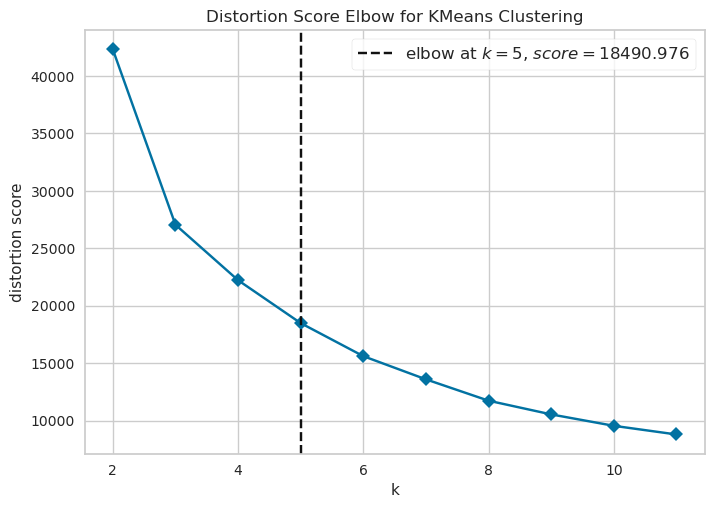

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
visualizer.fit(adult_evaluation_scaled[columns_for_evaluation_2d])      # Fit the data to the visualizer
visualizer.show()

In [8]:
model = KMeans(n_clusters=visualizer.elbow_value_, init='random', algorithm='lloyd')
model.fit(adult_evaluation_scaled[columns_for_evaluation_2d])
model.labels_

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff38200820>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff3a4625e0>
Traceback 

array([3, 0, 2, ..., 0, 4, 2], dtype=int32)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


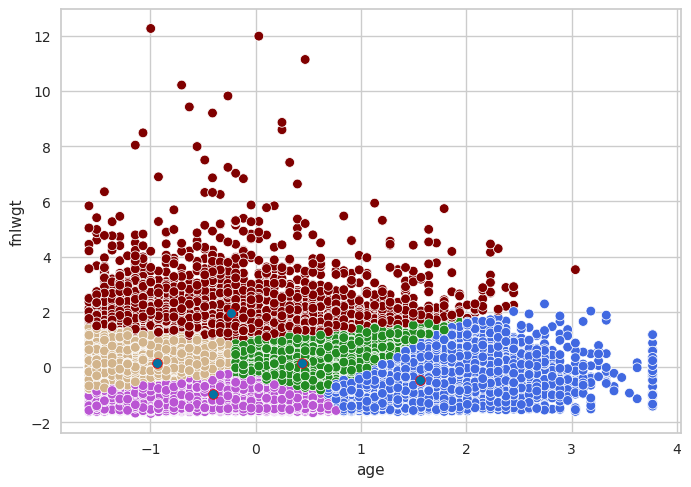

In [9]:
plot_2d_cluster(adult_evaluation_scaled, model, columns=columns_for_evaluation_2d)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff3a5a04c0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff3a5a04c0>
Traceback 

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=11), k=(2, 12),
                 timings=False)

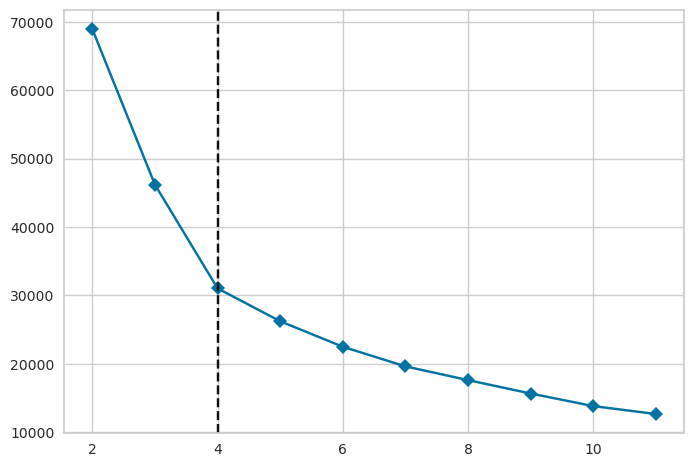

In [10]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), timings=False)
visualizer.fit(adult_evaluation_scaled)  

In [11]:
model = KMeans(n_clusters=visualizer.elbow_value_, init='random', algorithm='lloyd')
model.fit(adult_evaluation_scaled)
model.labels_

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff38072f70>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff380ff160>
Traceback 

array([1, 2, 1, ..., 2, 1, 2], dtype=int32)

## DBSCAN

In [12]:
from Helpers import helpers

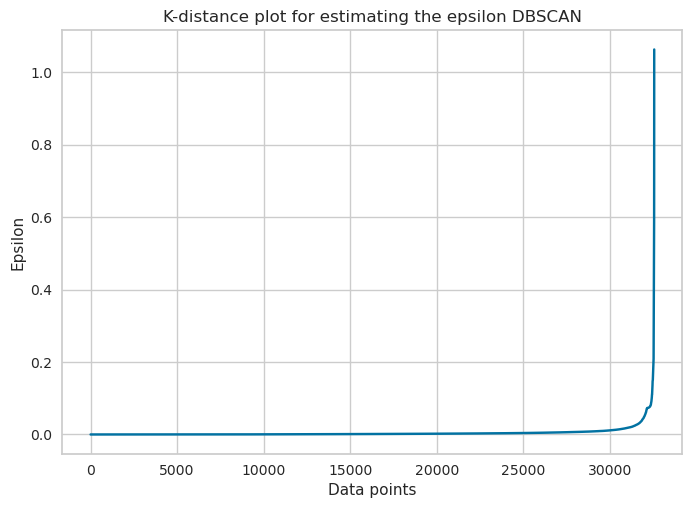

In [13]:
helpers.kDistancePlot(adult_evaluation_scaled[columns_for_evaluation_2d])

In [14]:
eps = 0.1

In [15]:
from sklearn.cluster import DBSCAN


model = DBSCAN(eps=eps, min_samples=4, metric='euclidean')
model.fit(adult_evaluation_scaled[columns_for_evaluation_2d])

DBSCAN(eps=0.1, min_samples=4)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

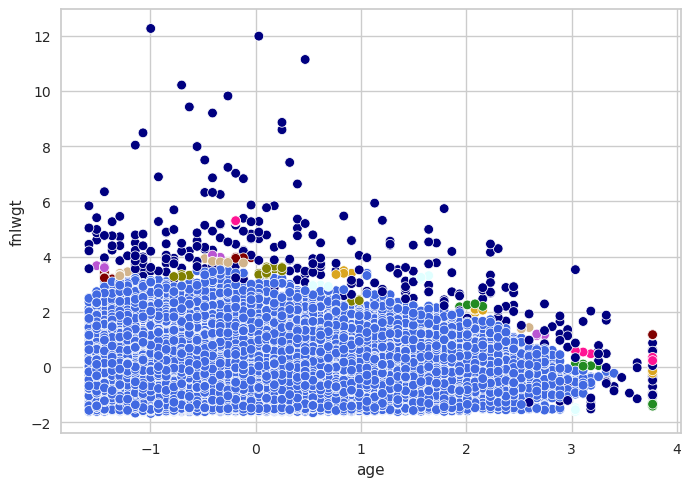

In [16]:
plot_2d_cluster(adult_evaluation_scaled, model, columns=columns_for_evaluation_2d)

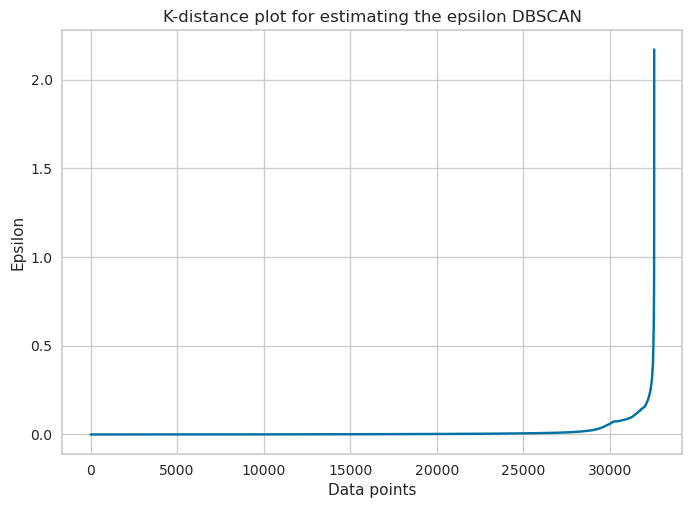

In [17]:
helpers.kDistancePlot(adult_evaluation_scaled)

In [18]:
eps = 0.3

model = DBSCAN(eps=eps, min_samples=6, metric='euclidean')
model.fit(adult_evaluation_scaled)

DBSCAN(eps=0.3, min_samples=6)

In [ ]:
model.labels_

array([0, 0, 0, ..., 0, 0, 1])

## Affinity propagation

In [19]:
from sklearn.cluster import AffinityPropagation
adult_evaluation_scaled = adult_evaluation_scaled.sample(frac = 0.25)

ap = AffinityPropagation(damping=0.5, affinity='euclidean')
ap.fit(adult_evaluation_scaled[columns_for_evaluation_2d])

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:236: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


AffinityPropagation()

Parameters:
- affinity propagation: damping=0.5, affinity='euclidean'
- k-means: n_clusters=5, init='random' algorithm: lloyd (both 2d and 3d)
- dbscan: eps=0.3, min_samples=6, metric='euclidean' for 3d
- dbscan2d: eps=0.1, min_samples=4, metric='euclidean' for 2d

We decided to cut affinity propagtion as the time it takes for 15 minutes is to long (and it still did not converge).

In [29]:
adult_dataset = adult_dataset.convert_dtypes()
adult_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  Int64 
 1   workclass       32561 non-null  string
 2   fnlwgt          32561 non-null  Int64 
 3   education       32561 non-null  string
 4   education-num   32561 non-null  Int64 
 5   marital-status  32561 non-null  string
 6   occupation      32561 non-null  string
 7   relationship    32561 non-null  string
 8   race            32561 non-null  string
 9   sex             32561 non-null  string
 10  capital-gain    32561 non-null  Int64 
 11  capital-loss    32561 non-null  Int64 
 12  hours-per-week  32561 non-null  Int64 
 13  native-country  32561 non-null  string
 14  income          32561 non-null  string
 15  class           32561 non-null  Int64 
dtypes: Int64(7), string(9)
memory usage: 4.2 MB


In [33]:
adult_dataset['class'] = adult_dataset['income']
adult_dataset['class'].value_counts()

<=50K    24720
>50K      7841
Name: class, dtype: Int64

In [38]:
adult_for_export = adult_dataset_numeric[columns_for_evaluation]
adult_for_export['class'] = adult_dataset['class']
adult_for_export_2d = adult_for_export.drop(columns=['capital-gain'])

/tmp/ipykernel_80728/1834067103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_for_export['class'] = adult_dataset['class']


In [36]:
adult_for_export.head()

,age,fnlwgt,capital-gain,class
0,39,77516,2174,<=50K
1,50,83311,0,<=50K
2,38,215646,0,<=50K
3,53,234721,0,<=50K
4,28,338409,0,<=50K


In [39]:
adult_for_export_2d.head()

,age,fnlwgt,class
0,39,77516,<=50K
1,50,83311,<=50K
2,38,215646,<=50K
3,53,234721,<=50K
4,28,338409,<=50K


In [42]:
adult_for_export_2d.to_csv('./data/adult-dataset/adult_for_export_2d.csv', index=False)
adult_for_export.to_csv('./data/adult-dataset/adult_for_export_3d.csv', index=False)